## *2. Gradient Descent*

In [2]:
# 2.1 Write a function to compute the mean squared error between a prediction and ground truth assuming both are numpy arrays

import numpy as np

def mean_sq_err(arr_prediction , arr_truth):
    
    num_of_terms1 = np.prod(arr_prediction.shape)
    num_of_terms2 = np.prod(arr_truth.shape)
    
    if(num_of_terms1 != num_of_terms2):
        return "Invalid argument";
    else:
        return (np.sum((arr_prediction - arr_truth)**2))/num_of_terms1;
    
arr1 = np.array([3, -0.5, 2, 7])
arr2 = np.array([2.5, 0.0, 2, 8])
mean_sq_err(arr1, arr2)

#Actual= np.random.randn(1,5)
#Prediction= np.random.randn(1,5)
#mean_sq_err(Actual, Prediction)
#0.375

0.375

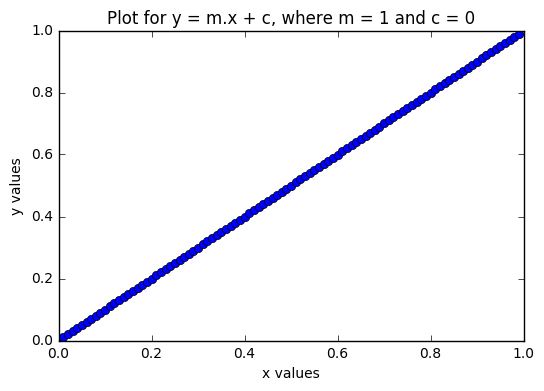

In [3]:
# 2.2 & 2.3 Plot a function &  Generate Data

import matplotlib.pyplot as plt

x = np.arange(0. , 1 , 0.01)
m = 1.
c = 0.
y = m*x + c
# Temp = np.random.uniform()
plt.plot(x, y, 'bo')
plt.xlabel("x values")
plt.ylabel("y values")
plt.title('Plot for y = m.x + c, where m = 1 and c = 0')
plt.show()

In [4]:
# 2.4 use backpropagation and gradient descent updates to find the model parameters

def grad_desc(learning_rate, num_trials):
    #Random initialization
    W = 0.01
    b = 0.01
    #learning_rate = 0.01 #Also called learning rate
    loss_vec = [] # store the error for plotting

    # gradient descent loop
    for i in range(num_trials):

        # evaluate class scores, [N x K]
        scores = np.dot(x, W) + b # 100*1

        # compute the loss: we use our mean-squared error function
        data_loss =mean_sq_err(scores, y)
        loss = data_loss
        if i % 100 == 0:
            print("iteration:",i, " loss:",loss)
        loss_vec.append(loss)

        # backpropate the gradient to the parameters (W,b)
        #dW = 2*(y-scores)/num_examples*x
        #db = 2*(y-scores)/num_examples
        dW = np.sum(x*(scores-y)) # Be careful, earlier it was 100*1 . 100*1 = 100*1. After taking sum, it is working fine !!
        db = np.sum((scores - y))
        # dW += reg*W # regularization gradient

        # perform a parameter update
        W += -learning_rate * dW
        b += -learning_rate * db

    #print("W = ",W)
    #print("b = ",b)
    return W, b, loss_vec

iteration: 0  loss: 0.312114835
iteration: 100  loss: 5.97864413347e-08
iteration: 0  loss: 0.312114835
iteration: 100  loss: 0.0135754991324
iteration: 0  loss: 0.312114835
iteration: 100  loss: 0.0653083648916


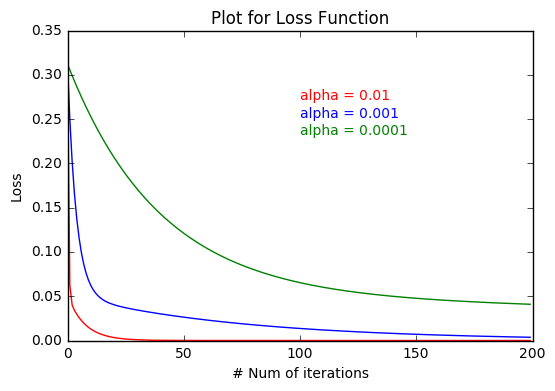

In [6]:
# 2.5 Plot the errors by changing LEARNING_RATE

trial1 = grad_desc(0.01, 200)
trial2 = grad_desc(0.001, 200)
trial3 = grad_desc(0.0001, 200)

plt.plot(np.arange(0, 200),trial1[2],'r') # plotting t,a separately 
plt.plot(np.arange(0, 200),trial2[2],'b') # plotting t,b separately 
plt.plot(np.arange(0, 200),trial3[2],'g')
plt.xlabel("# Num of iterations")
plt.ylabel("Loss")
plt.title('Plot for Loss Function')
plt.text(100, max(trial3[2])-0.08, 'alpha = 0.0001' ,color = 'green')
plt.text(100, max(trial3[2])-0.06, 'alpha = 0.001' ,color = 'blue')
plt.text(100, max(trial3[2])-0.04, 'alpha = 0.01' ,color = 'red')
plt.show()

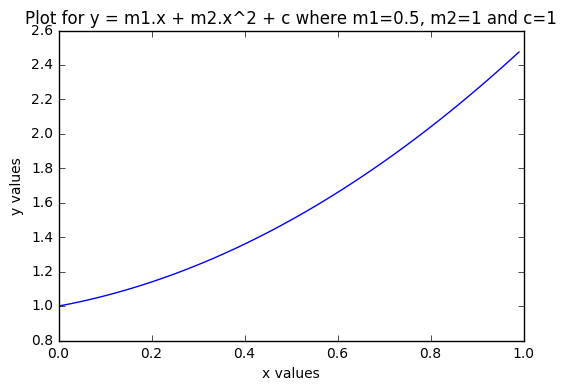

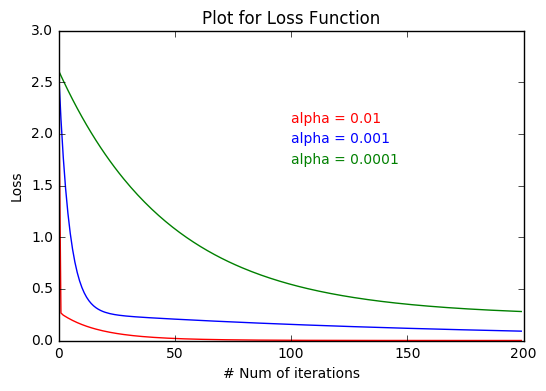

In [27]:
# 2.6 Repeat steps 3-5 when the model is y = m1x + m2x2 + c and 
#     the true parameters are m1 = 0:5, m2 = 1 and c = 1. And x 2 (0; 1).

#import numpy as np
#import random
#import matplotlib.pyplot as plt
m1 = 0.5
m2 = 1
c = 1
x = np.arange(0,1,0.01)
y = m1*x + m2*x**2 + c
#print(y)
plt.plot(x,y)
plt.xlabel("x values")
plt.ylabel("y values")
plt.title('Plot for y = m1.x + m2.x^2 + c where m1=0.5, m2=1 and c=1')
plt.show()

# Parameter estimation using back propogation
def gradientdescent(x,y,m11,m12,c1,step_size,iterations):
    temploss = np.zeros(iterations)
    for i in range(0, iterations):
        prediction = np.dot(x,m11) + np.dot(x**2,m12) + c1
        #loss = (((prediction - y) ** 2).mean())
        loss = mean_sq_err(prediction, y)
        temploss[i] = loss
        #print(i,loss)
        gradient = 2*(prediction-y)
        dm1 = np.dot(x,gradient)
        dm2 = np.dot(x**2,gradient)
        dc = gradient
        m11 += -step_size * dm1
        m12 += -step_size * dm2 
        c1  += -step_size * dc 
    return (m11,m12,temploss)

trial4 = gradientdescent(x,y,0.01,0.01,0.01,0.01,200)
trial5 = gradientdescent(x,y,0.01,0.01,0.01,0.001,200)
trial6 = gradientdescent(x,y,0.01,0.01,0.01,0.0001,200)

plt.plot(np.arange(0, 200),trial4[2],'r') # plotting t,a separately 
plt.plot(np.arange(0, 200),trial5[2],'b') # plotting t,b separately 
plt.plot(np.arange(0, 200),trial6[2],'g')
plt.xlabel("# Num of iterations")
plt.ylabel("Loss")
plt.title('Plot for Loss Function')
plt.text(100, max(trial6[2])-0.9, 'alpha = 0.0001' ,color = 'green')
plt.text(100, max(trial6[2])-0.7, 'alpha = 0.001' ,color = 'blue')
plt.text(100, max(trial6[2])-0.5, 'alpha = 0.01' ,color = 'red')
plt.show()


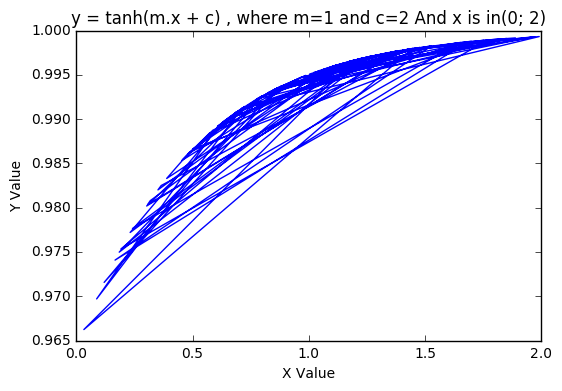

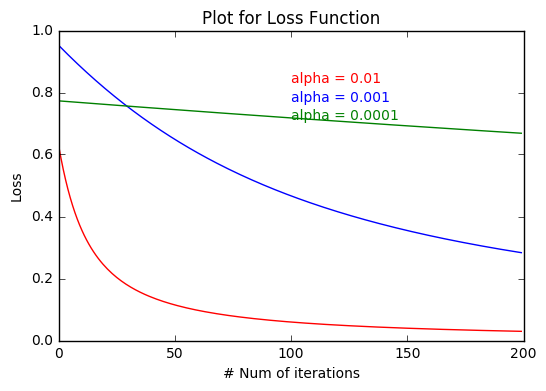

In [47]:
# 2.7 

m=1
c=2
np.random.seed(123)
X=np.random.uniform(0.0, 2.0,100)
Y=np.tanh(m*X+c)

plt.plot(X,Y)
plt.xlabel("X Value")
plt.ylabel("Y Value")
plt.title("y = tanh(m.x + c) , where m=1 and c=2 And x is in(0; 2)")
plt.show()

def gradient_descent_tanh(learning_rate, trials):
    W = 0.1 * np.random.randn()
    b = np.zeros(1)
    #print(W)
    num_examples=X.shape

    #Initial value for the Gradient Descent Parameter
    step_size = learning_rate #Also called learning rate
    iterations=trials
    data_loss = np.zeros(iterations)

    # gradient descent loop
    for i in range(0,iterations):
        # evaluate predicted Y
        Prediction = np.tanh(X*W + b)

        # compute the loss: average cross-entropy loss
        #loss= calculate_MSE(Y, Prediction)
        loss = mean_sq_err(Prediction, Y)
        data_loss[i]=loss
        #print(loss)
        #if i % 10 == 0:
         #   print "iteration %d: loss %f" % (i, loss)

        # compute the gradient on scores
        dscores =2*(Prediction-Y)*(1-Prediction*Prediction)/num_examples

        # backpropate the gradient to the parameters (W,b)
        dW = np.sum(np.dot(X.T, dscores))
        db = np.sum(dscores)

        # perform a parameter update
        W += -step_size * dW
        b += -step_size * db
    return W,b,data_loss;



trial7 = gradient_descent_tanh(0.01,200)
trial8 = gradient_descent_tanh(0.001,200)
trial9 = gradient_descent_tanh(0.0001,200)

plt.plot(np.arange(0, 200),trial7[2],'r') # plotting t,a separately 
plt.plot(np.arange(0, 200),trial8[2],'b') # plotting t,b separately 
plt.plot(np.arange(0, 200),trial9[2],'g')
plt.xlabel("# Num of iterations")
plt.ylabel("Loss")
plt.title('Plot for Loss Function')
plt.text(100, max(trial8[2])-0.24, 'alpha = 0.0001' ,color = 'green')
plt.text(100, max(trial8[2])-0.18, 'alpha = 0.001' ,color = 'blue')
plt.text(100, max(trial8[2])-0.12, 'alpha = 0.01' ,color = 'red')
plt.show()



## *3. ML Basics*

In [7]:
# 3.1. Write a function to compute the logistic loss

import numpy as np

# Challenge: Logistic loss = e^a/(e^a + e^b), but here in linear classifier how do we fit this?
def logistic_loss(W, b, X, y):
    # evaluate class scores, [N x K]
    scores = np.dot(X, W) + b 
  
    # compute the class probability
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]  # How do we deal if there is only one output 
    
    num_examples = len(X)
    #print(num_examples)
    #print(probs[range(num_examples),y])
    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples),y])
    #print("corect_logprobs shape : ",corect_logprobs.shape)
    #print(y)
    #print("corect_logprobs shape : ",corect_logprobs.shape)
    data_loss = np.sum(corect_logprobs)/num_examples
    #print("data_loss shape : ",data_loss.shape)
    
    return data_loss;
    
# 3.2. Write a function to compute the multiclass SVM loss given the parameters (W; b)
# of a linear model (as numpy arrays) and an example (x; y).

def multiClass_SVM_Loss(W, b, X, y):
    # evaluate class scores, [N x K]
    scores = np.dot(X, W) + b 
    correct_scores = scores[range(num_examples),y]
    
    loss = scores - correct_scores + np.ones[scores.shape]
    loss[loss<0] = 0
    loss[range(num_examples),y] = 0
    svm_loss = np.sum(loss)
    return svm_loss
    
    
# 3.3 Add an `1 regularization and an `2 regularization to the loss function.
# Can I add the regularization term separately ? 0.5*Lambda*W^2 and 0.5*Lambda*W

def logistic_loss_lasso(W,b,X,y,reg):
    data_loss = logistic_loss(W, b, X, y)
    reg_loss = 0.5*reg*np.sum(W)
    data_loss = data_loss + reg_loss
    return data_loss

def logistic_loss_ridge(W,b,X,y,reg):
    data_loss = logistic_loss(W, b, X, y)
    reg_loss = 0.5*reg*np.sum(W*W)
    data_loss = data_loss + reg_loss
    return data_loss

def multiClass_SVM_Loss_lasso(W,b,X,y,reg):
    data_loss = multiClass_SVM_Loss(W, b, X, y)
    reg_loss = 0.5*reg*np.sum(W)
    data_loss = data_loss + reg_loss
    return data_loss

def multiClass_SVM_Loss_ridge(W,b,X,y,reg):
    data_loss = multiClass_SVM_Loss(W, b, X, y)
    reg_loss = 0.5*reg*np.sum(W*W)
    data_loss = data_loss + reg_loss
    return data_loss
    
def logistic_loss_elastic(W,b,X,y,reg):
    data_loss = logistic_loss(W, b, X, y)
    reg_loss = 0.5*reg*np.sum(W) + 0.5*reg*np.sum(W*W)  # How to chose the parameters ???
    data_loss = data_loss + reg_loss
    return data_loss
    

## *4. Classification pipeline*

In [8]:
# 4.1 Generate data from data generator 2d.py.
import numpy as np
import pickle
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

pickle.dump(X,open('dataX.pickle','wb'))
pickle.dump(y,open('dataY.pickle','wb'))

In [17]:
# 4.2 Split the data into test and train (20%:80%)

#Read data
X = pickle.load(open('dataX.pickle','rb'))
y = pickle.load(open('dataY.pickle','rb'))
# print(X)
# print(y)
import pandas as pd
import random

#from sklearn.model_selection import train_test_split
from sklearn.cross_validation  import train_test_split

# define a function for splitting the data
def split_data(X,y,test_proportion):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_proportion, random_state=0)
    print(X_train.shape, y_train.shape)
    return X_train, X_test, y_train, y_test; 
#print(y_test)

#split_data(X,y,0.2)

In [10]:
# 4.3 Build a linear classifer assuming the multiclass logistic loss and an `2 regularization for the weights only

def linear_classifier(X_train,y_train,reg,learning_rate,iterations):
    D = X_train.shape[1]
    #print(D)
    k = int(max(y_train)+ 1)
    #print(k)
    random.seed(700)
    W = 0.1*np.random.randn(D,k)   # How do you declare a D*K matrix ??? Be careful !!!
    b = 0.1*np.zeros((1,k))
    #reg = 0.0001
    #learning_rate = 0.1
    data_loss = np.zeros(iterations)

    for i in range(iterations):
        scores = np.dot(X_train,W)+ b

        # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

        # compute the loss
        loss = logistic_loss_ridge(W,b,X_train,y_train,reg)
        data_loss[i]=loss
        #if i % 10 == 0:
            #print("iteration:",i, " loss:",loss)

        # compute the gradient on scores
        num_examples = len(X_train)
        dscores = probs
        dscores[range(num_examples),y_train] -= 1
        dscores /= num_examples

        # backpropate the gradient to the parameters (W,b)
        dW = np.dot(X_train.T, dscores)
        db = np.sum(dscores, axis=0, keepdims=True)

        dW += reg*W # regularization gradient

        # perform a parameter update
        W += -learning_rate * dW
        b += -learning_rate * db
        return W,b,data_loss;


In [11]:
test_proportion = 0.2
X_train, X_test, y_train, y_test = split_data(X,y,test_proportion)

W,b,loss = linear_classifier(X_train,y_train,0.0001,0.1,500)
# Performance check
y_hat_train = np.argmax((np.dot(X_train, W)+b), axis = 1)
training_precision = np.mean(y_hat_train == y_train)
print("Accuracy train = ",training_precision)

y_hat_test = np.argmax((np.dot(X_test, W)+b), axis = 1)
test_precision = np.mean(y_hat_test == y_test)
print("Accuracy test = ",test_precision)


(240, 2) (240,)
Accuracy train =  0.525
Accuracy test =  0.416666666667


In [12]:
# 4.4 Introduce a cross validation scheme and justify your choice. What is the validation
#     accuracy compare to the test accuracy

from sklearn import cross_validation

cv = cross_validation.KFold(len(X_train), n_folds=10, shuffle=True)
i = 0
for train_indices, test_indices in cv:
    #Get parameters by training data on 9 folds
    W,b,loss = linear_classifier(X_train[train_indices],y_train[train_indices],0.0001,0.1,500)
    i = i+1
    #Get accuracy by testing on remaining 1 fold
    y_hat_test = np.argmax((np.dot(X_train[test_indices], W)+b), axis = 1)
    test_precision = np.mean(y_hat_test == y_train[test_indices])
    print("CV ",i," test accuracy  = ",test_precision)



CV  1  test accuracy  =  0.0833333333333
CV  2  test accuracy  =  0.291666666667
CV  3  test accuracy  =  0.125
CV  4  test accuracy  =  0.208333333333
CV  5  test accuracy  =  0.5
CV  6  test accuracy  =  0.458333333333
CV  7  test accuracy  =  0.208333333333
CV  8  test accuracy  =  0.291666666667
CV  9  test accuracy  =  0.416666666667
CV  10  test accuracy  =  0.375


(240, 2) (240,)
# of Iterations =  1  | Accuracy train =  0.170833333333  | Accuracy test =  0.183333333333
# of Iterations =  2  | Accuracy train =  0.3375  | Accuracy test =  0.4
# of Iterations =  3  | Accuracy train =  0.370833333333  | Accuracy test =  0.35
# of Iterations =  4  | Accuracy train =  0.2125  | Accuracy test =  0.216666666667
# of Iterations =  5  | Accuracy train =  0.3375  | Accuracy test =  0.416666666667
# of Iterations =  6  | Accuracy train =  0.520833333333  | Accuracy test =  0.416666666667
# of Iterations =  7  | Accuracy train =  0.404166666667  | Accuracy test =  0.383333333333
# of Iterations =  8  | Accuracy train =  0.329166666667  | Accuracy test =  0.266666666667
# of Iterations =  9  | Accuracy train =  0.266666666667  | Accuracy test =  0.233333333333
# of Iterations =  10  | Accuracy train =  0.491666666667  | Accuracy test =  0.45
# of Iterations =  11  | Accuracy train =  0.291666666667  | Accuracy test =  0.283333333333
# of Iterations =  12  | 

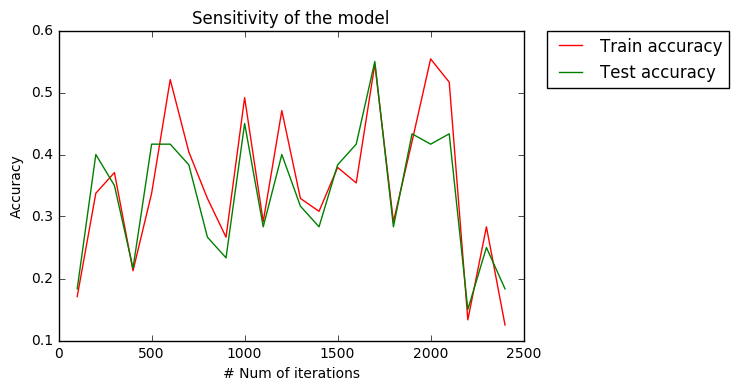

In [13]:
# 4.5. What is the sensitivity of the model's performance to different learning rates and
# the number of gradient descent iterations. Describe via suitable plots.
# Iterations = 100, 600, 11000, 16000, 21000, 2600
# Learning rates = 0.0001, 0.001, 0.01, 1, 2, 5 
# Sensitivity = true positive / total actual positives 

test_proportion = 0.2
X_train, X_test, y_train, y_test = split_data(X,y,test_proportion)
j = 0
train_acc = []
test_acc = []
x_axis = []
for i in range(1, 25):
    W,b,loss = linear_classifier(X_train,y_train,0.0001,0.1,i*100)
    
    # Performance check
    y_hat_train = np.argmax((np.dot(X_train, W)+b), axis = 1)
    training_precision = np.mean(y_hat_train == y_train)
    
    y_hat_test = np.argmax((np.dot(X_test, W)+b), axis = 1)
    test_precision = np.mean(y_hat_test == y_test)
    print("# of Iterations = ",i," | Accuracy train = ",training_precision, " | Accuracy test = ",test_precision)
    
    x_axis.append(i*100)
    train_acc.append(training_precision)
    test_acc.append(test_precision)

plt.plot(x_axis,train_acc,'r',label = "Train accuracy") 
plt.plot(x_axis,test_acc,'g',label = "Test accuracy")
plt.xlabel("# Num of iterations")
plt.ylabel("Accuracy")
plt.title("Sensitivity of the model")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.text(100, max(train_acc[2])-max(train_acc[2]/10), 'Test accuracy' ,color = 'green')
#plt.text(100, max(train_acc[2])-max(train_acc[2]/8), 'Train accuracy' ,color = 'red')
plt.show()

# of Iterations =  1  | Accuracy train =  0.541666666667  | Accuracy test =  0.466666666667
# of Iterations =  11  | Accuracy train =  0.133333333333  | Accuracy test =  0.216666666667
# of Iterations =  21  | Accuracy train =  0.266666666667  | Accuracy test =  0.366666666667
# of Iterations =  31  | Accuracy train =  0.445833333333  | Accuracy test =  0.333333333333
# of Iterations =  41  | Accuracy train =  0.4625  | Accuracy test =  0.5
# of Iterations =  51  | Accuracy train =  0.5375  | Accuracy test =  0.45
# of Iterations =  61  | Accuracy train =  0.529166666667  | Accuracy test =  0.55
# of Iterations =  71  | Accuracy train =  0.545833333333  | Accuracy test =  0.483333333333
# of Iterations =  81  | Accuracy train =  0.479166666667  | Accuracy test =  0.433333333333
# of Iterations =  91  | Accuracy train =  0.4875  | Accuracy test =  0.466666666667
# of Iterations =  101  | Accuracy train =  0.379166666667  | Accuracy test =  0.333333333333
# of Iterations =  111  | Accura

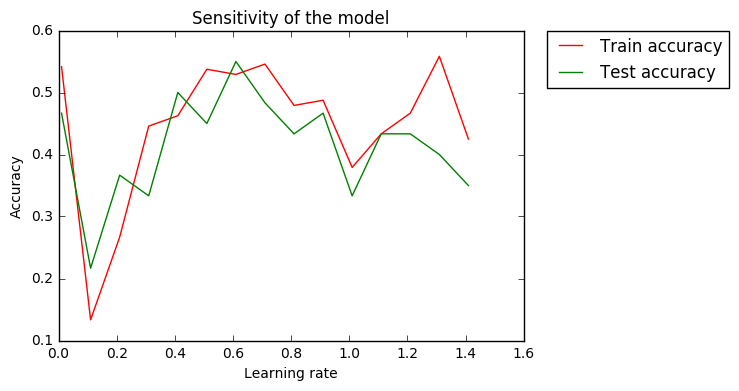

In [16]:
j = 0
train_acc = []
test_acc = []
x_axis = []
for i in range(1, 151, 10):
    W,b,loss = linear_classifier(X_train,y_train,0.0001,i/100,2000)
    
    # Performance check
    y_hat_train = np.argmax((np.dot(X_train, W)+b), axis = 1)
    training_precision = np.mean(y_hat_train == y_train)
    
    y_hat_test = np.argmax((np.dot(X_test, W)+b), axis = 1)
    test_precision = np.mean(y_hat_test == y_test)
    print("# of Iterations = ",i," | Accuracy train = ",training_precision, " | Accuracy test = ",test_precision)
    
    x_axis.append(i/100)
    train_acc.append(training_precision)
    test_acc.append(test_precision)
    
plt.plot(x_axis,train_acc,'r',label = "Train accuracy") 
plt.plot(x_axis,test_acc,'g',label = "Test accuracy")
plt.xlabel("Learning rate")
plt.ylabel("Accuracy")
plt.title("Sensitivity of the model")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.text(100, max(train_acc[2])-max(train_acc[2]/10), 'Test accuracy' ,color = 'green')
#plt.text(100, max(train_acc[2])-max(train_acc[2]/8), 'Train accuracy' ,color = 'red')
plt.show()

# of Iterations =  1  | Accuracy train =  0.554166666667  | Accuracy test =  0.5
# of Iterations =  11  | Accuracy train =  0.525  | Accuracy test =  0.5
# of Iterations =  21  | Accuracy train =  0.5375  | Accuracy test =  0.5
# of Iterations =  31  | Accuracy train =  0.566666666667  | Accuracy test =  0.416666666667
# of Iterations =  41  | Accuracy train =  0.575  | Accuracy test =  0.4
# of Iterations =  51  | Accuracy train =  0.5375  | Accuracy test =  0.483333333333
# of Iterations =  61  | Accuracy train =  0.441666666667  | Accuracy test =  0.4
# of Iterations =  71  | Accuracy train =  0.5625  | Accuracy test =  0.466666666667
# of Iterations =  81  | Accuracy train =  0.5125  | Accuracy test =  0.483333333333
# of Iterations =  91  | Accuracy train =  0.55  | Accuracy test =  0.45
# of Iterations =  101  | Accuracy train =  0.4375  | Accuracy test =  0.4
# of Iterations =  111  | Accuracy train =  0.508333333333  | Accuracy test =  0.466666666667
# of Iterations =  121  | A

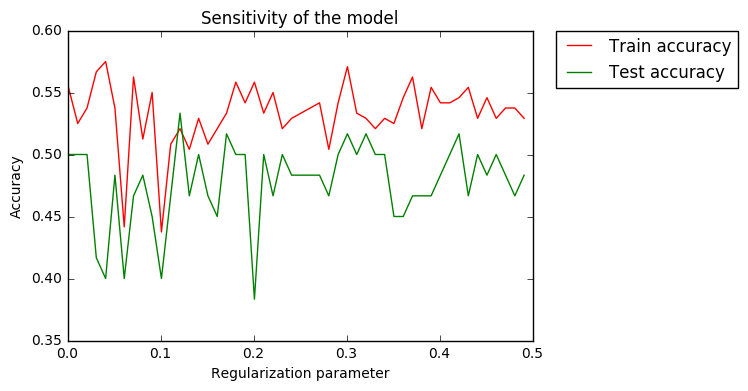

In [18]:
# 4.6. What is the sensitivity of the model's performance to different regularization pa-
# rameter values. Find the best regularization parameter using an exhaustive search
# procedure. Describe your choice via suitable plots. What is the performance differ-
# ence between using regularization and no regularization?
# reg = 0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 2, 10

j = 0
train_acc = []
test_acc = []
x_axis = []
for i in range(1, 501, 10):
    W,b,loss = linear_classifier(X_train,y_train,i/1000,1.7,1000)
    # Performance check
    y_hat_train = np.argmax((np.dot(X_train, W)+b), axis = 1)
    training_precision = np.mean(y_hat_train == y_train)
    
    y_hat_test = np.argmax((np.dot(X_test, W)+b), axis = 1)
    test_precision = np.mean(y_hat_test == y_test)
    print("# of Iterations = ",i," | Accuracy train = ",training_precision, " | Accuracy test = ",test_precision)
    
    x_axis.append(i/1000)
    train_acc.append(training_precision)
    test_acc.append(test_precision)
    
plt.plot(x_axis,train_acc,'r',label = "Train accuracy") 
plt.plot(x_axis,test_acc,'g',label = "Test accuracy")
plt.xlabel("Regularization parameter")
plt.ylabel("Accuracy")
plt.title("Sensitivity of the model")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.text(100, max(train_acc[2])-max(train_acc[2]/10), 'Test accuracy' ,color = 'green')
#plt.text(100, max(train_acc[2])-max(train_acc[2]/8), 'Train accuracy' ,color = 'red')
plt.show()


# of Iterations =  1  | Accuracy train =  0.592592592593  | Accuracy test =  0.483516483516
# of Iterations =  2  | Accuracy train =  0.592592592593  | Accuracy test =  0.461538461538
# of Iterations =  3  | Accuracy train =  0.666666666667  | Accuracy test =  0.450549450549
# of Iterations =  4  | Accuracy train =  0.62962962963  | Accuracy test =  0.534798534799
# of Iterations =  5  | Accuracy train =  0.666666666667  | Accuracy test =  0.483516483516
# of Iterations =  6  | Accuracy train =  0.703703703704  | Accuracy test =  0.556776556777
# of Iterations =  7  | Accuracy train =  0.592592592593  | Accuracy test =  0.52380952381
# of Iterations =  8  | Accuracy train =  0.666666666667  | Accuracy test =  0.52380952381
# of Iterations =  9  | Accuracy train =  0.703703703704  | Accuracy test =  0.487179487179
# of Iterations =  10  | Accuracy train =  0.62962962963  | Accuracy test =  0.483516483516
# of Iterations =  11  | Accuracy train =  0.62962962963  | Accuracy test =  0.5238

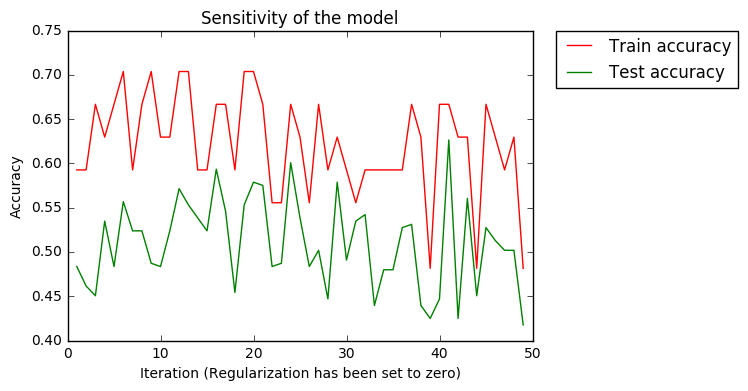

In [24]:
# 4.6. When no regularization is used

j = 0
train_acc = []
test_acc = []
x_axis = []
for i in range(1, 50):
    W,b,loss = linear_classifier(X_train,y_train,0,1.7,1000)
    # Performance check
    y_hat_train = np.argmax((np.dot(X_train, W)+b), axis = 1)
    training_precision = np.mean(y_hat_train == y_train)
    
    y_hat_test = np.argmax((np.dot(X_test, W)+b), axis = 1)
    test_precision = np.mean(y_hat_test == y_test)
    print("# of Iterations = ",i," | Accuracy train = ",training_precision, " | Accuracy test = ",test_precision)
    
    x_axis.append(i)
    train_acc.append(training_precision)
    test_acc.append(test_precision)
    
plt.plot(x_axis,train_acc,'r',label = "Train accuracy") 
plt.plot(x_axis,test_acc,'g',label = "Test accuracy")
plt.xlabel("Iteration (Regularization has been set to zero)")
plt.ylabel("Accuracy")
plt.title("Sensitivity of the model")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.text(100, max(train_acc[2])-max(train_acc[2]/10), 'Test accuracy' ,color = 'green')
#plt.text(100, max(train_acc[2])-max(train_acc[2]/8), 'Train accuracy' ,color = 'red')
plt.show()


(297, 2) (297,)
# of Iterations =  1  | Accuracy train =  0.508417508418  | Accuracy test =  0.333333333333
(267, 2) (267,)
# of Iterations =  11  | Accuracy train =  0.561797752809  | Accuracy test =  0.424242424242
(237, 2) (237,)
# of Iterations =  21  | Accuracy train =  0.569620253165  | Accuracy test =  0.396825396825
(207, 2) (207,)
# of Iterations =  31  | Accuracy train =  0.574879227053  | Accuracy test =  0.516129032258
(177, 2) (177,)
# of Iterations =  41  | Accuracy train =  0.610169491525  | Accuracy test =  0.577235772358
(147, 2) (147,)
# of Iterations =  51  | Accuracy train =  0.551020408163  | Accuracy test =  0.522875816993
(117, 2) (117,)
# of Iterations =  61  | Accuracy train =  0.547008547009  | Accuracy test =  0.530054644809
(87, 2) (87,)
# of Iterations =  71  | Accuracy train =  0.67816091954  | Accuracy test =  0.544600938967
(56, 2) (56,)
# of Iterations =  81  | Accuracy train =  0.660714285714  | Accuracy test =  0.55737704918
(27, 2) (27,)
# of Iterati

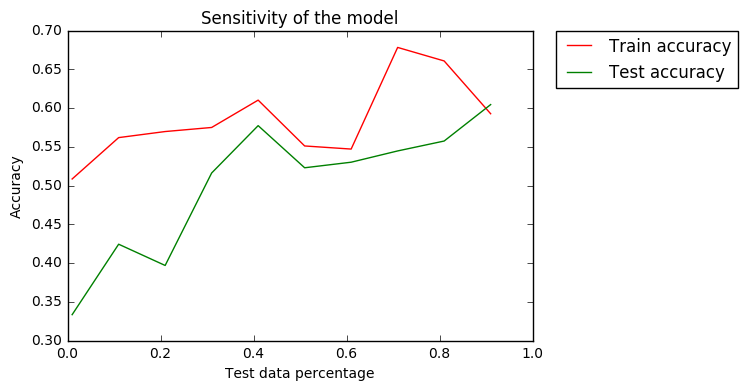

In [19]:
# 4.7 7. What is the sensitivity of the model's performance with respect to a different test train split (50%:50%)
#        Sensitivity w.r.t Time for function call !!

#cv = cross_validation.KFold(len(X_train), n_folds=2, shuffle=True)

#for train_indices, test_indices in cv:
#    linear_classifier_multiclass_logit_and_l2_loss(train_indices, test_indices)

j = 0
train_acc = []
test_acc = []
x_axis = []
for i in range(1, 100, 10):
    X_train, X_test, y_train, y_test = split_data(X,y,i/100)

    W,b,loss = linear_classifier(X_train,y_train,0.002,1.7,1000)
    # Performance check
    y_hat_train = np.argmax((np.dot(X_train, W)+b), axis = 1)
    training_precision = np.mean(y_hat_train == y_train)

    y_hat_test = np.argmax((np.dot(X_test, W)+b), axis = 1)
    test_precision = np.mean(y_hat_test == y_test)
    print("# of Iterations = ",i," | Accuracy train = ",training_precision, " | Accuracy test = ",test_precision)
    x_axis.append(i/100)
    train_acc.append(training_precision)
    test_acc.append(test_precision)
    
plt.plot(x_axis,train_acc,'r',label = "Train accuracy") 
plt.plot(x_axis,test_acc,'g',label = "Test accuracy")
plt.xlabel("Test data percentage")
plt.ylabel("Accuracy")
plt.title("Sensitivity of the model")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.text(100, max(train_acc[2])-max(train_acc[2]/10), 'Test accuracy' ,color = 'green')
#plt.text(100, max(train_acc[2])-max(train_acc[2]/8), 'Train accuracy' ,color = 'red')
plt.show()